# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
!pip install citipy
import csv


# Import API key

from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

base_url = f"{url}appid={weather_api_key}&units={units}&q="


successful_cities = []
lat=[]
lng=[]
country=[]
temp = []
humidity=[]
cloudiness=[]
wind_speed=[]



for city in cities:    
    query_url = base_url + city
    response = requests.get(query_url)
    if response.status_code == 200:
        city_data = response.json()
        successful_cities.append(city)
        print(f"Response city {city} and {query_url} and {response}")
        lat.append(city_data["coord"]["lat"])
        lng.append(city_data["coord"]["lon"])
        country.append(city_data["sys"]["country"])
        temp.append(city_data['main']['temp'])
        humidity.append(city_data["main"]["humidity"])
        cloudiness.append(city_data["clouds"]["all"])
        wind_speed.append(city_data["wind"]["speed"])
        pprint(city_data)
    else: 
    
        print(f"{city} not found!")
   

         
    
    



Response city torbay and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=torbay and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 47.6666, 'lon': -52.7314},
 'dt': 1619662638,
 'id': 6167817,
 'main': {'feels_like': -1.87,
          'humidity': 87,
          'pressure': 1009,
          'temp': 3.05,
          'temp_max': 3.33,
          'temp_min': 2.78},
 'name': 'Torbay',
 'sys': {'country': 'CA',
         'id': 998,
         'sunrise': 1619597888,
         'sunset': 1619649503,
         'type': 1},
 'timezone': -9000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'gust': 9.77, 'speed': 6.69}}
Response city saskylakh and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=saskylakh and <Response [200]>
{'b

          'pressure': 1010,
          'temp': 7.85,
          'temp_max': 8,
          'temp_min': 7.78},
 'name': 'Brockville',
 'sys': {'country': 'CA',
         'id': 5184,
         'sunrise': 1619603817,
         'sunset': 1619654589,
         'type': 1},
 'timezone': -14400,
 'visibility': 6437,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 30, 'speed': 2.06}}
Response city lubango and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=lubango and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 27},
 'cod': 200,
 'coord': {'lat': -14.9172, 'lon': 13.4925},
 'dt': 1619663055,
 'id': 3347762,
 'main': {'feels_like': 15.67,
          'grnd_level': 826,
          'humidity': 69,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 16.19,
          'temp_max': 16.19,
          'temp_min': 16.19},
 'name': 'Lubango',
 'sys': {'country': 'AO', 'sunrise': 16

Response city acari and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=acari and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 3},
 'cod': 200,
 'coord': {'lat': -15.4311, 'lon': -74.6158},
 'dt': 1619663147,
 'id': 3948613,
 'main': {'feels_like': 21.04,
          'grnd_level': 997,
          'humidity': 79,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 20.84,
          'temp_max': 20.84,
          'temp_min': 20.84},
 'name': 'Acarí',
 'sys': {'country': 'PE', 'sunrise': 1619608100, 'sunset': 1619649794},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 138, 'gust': 1.74, 'speed': 1.22}}
Response city kodiak and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=kodiak and <Response [200]>
{'base': 'stati

Response city punta arenas and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=punta arenas and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -53.15, 'lon': -70.9167},
 'dt': 1619663048,
 'id': 3874787,
 'main': {'feels_like': 0.26,
          'humidity': 81,
          'pressure': 1002,
          'temp': 5,
          'temp_max': 5,
          'temp_min': 5},
 'name': 'Punta Arenas',
 'sys': {'country': 'CL',
         'id': 8487,
         'sunrise': 1619610861,
         'sunset': 1619645258,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 270, 'speed': 7.72}}
Response city vila velha and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=vila velha and <Response [200]>
{'base': 'sta

Response city lasa and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=lasa and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 46.6166, 'lon': 10.7002},
 'dt': 1619663158,
 'id': 3175096,
 'main': {'feels_like': 7.32,
          'humidity': 100,
          'pressure': 1006,
          'temp': 8.77,
          'temp_max': 12.22,
          'temp_min': 5},
 'name': 'Laas',
 'sys': {'country': 'IT',
         'id': 6813,
         'sunrise': 1619669136,
         'sunset': 1619720595,
         'type': 1},
 'timezone': 7200,
 'visibility': 6000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 2.57}}
Response city busselton and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=busselton and <Response [200]>
{'base': 'stations',
 'clou

Response city ilulissat and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=ilulissat and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 69.2167, 'lon': -51.1},
 'dt': 1619663162,
 'id': 3423146,
 'main': {'feels_like': -3.37,
          'humidity': 80,
          'pressure': 1032,
          'temp': 0,
          'temp_max': 0,
          'temp_min': 0},
 'name': 'Ilulissat',
 'sys': {'country': 'GL',
         'id': 165,
         'sunrise': 1619676900,
         'sunset': 1619742492,
         'type': 1},
 'timezone': -7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 46, 'gust': 2.85, 'speed': 2.86}}
Response city avera and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=avera and <Response [200]>
{'base': 'stat

Response city bredasdorp and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=bredasdorp and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.5322, 'lon': 20.0403},
 'dt': 1619663169,
 'id': 1015776,
 'main': {'feels_like': 10.43,
          'humidity': 87,
          'pressure': 1017,
          'temp': 11,
          'temp_max': 11,
          'temp_min': 11},
 'name': 'Bredasdorp',
 'sys': {'country': 'ZA',
         'id': 1966,
         'sunrise': 1619673232,
         'sunset': 1619712015,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 30, 'speed': 3.6}}
Response city preobrazheniye and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=preobrazheniye and <Response [200]>
{'base': 's

Response city thompson and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=thompson and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 55.7435, 'lon': -97.8558},
 'dt': 1619662297,
 'id': 6165406,
 'main': {'feels_like': -5,
          'humidity': 29,
          'pressure': 1015,
          'temp': 0,
          'temp_max': 0,
          'temp_min': 0},
 'name': 'Thompson',
 'sys': {'country': 'CA',
         'id': 935,
         'sunrise': 1619607252,
         'sunset': 1619661796,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 5.14}}
Response city priladozhskiy and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=priladozhskiy and <Response [200]>
{'base': 'stations'

Response city mezica and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=mezica and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 46.5214, 'lon': 14.8544},
 'dt': 1619663177,
 'id': 3195202,
 'main': {'feels_like': 5.72,
          'humidity': 95,
          'pressure': 1008,
          'temp': 5.72,
          'temp_max': 7.78,
          'temp_min': 3.89},
 'name': 'Mežica',
 'sys': {'country': 'SI',
         'id': 2031903,
         'sunrise': 1619668154,
         'sunset': 1619719583,
         'type': 3},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 76, 'gust': 0.89, 'speed': 0.45}}
Response city taoudenni and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=taoudenni and <Response [200]>
{'bas

Response city sri aman and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=sri aman and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 1.2376, 'lon': 111.4621},
 'dt': 1619663181,
 'id': 1735799,
 'main': {'feels_like': 29.6,
          'humidity': 83,
          'pressure': 1012,
          'temp': 26.82,
          'temp_max': 28,
          'temp_min': 25.56},
 'name': 'Sri Aman',
 'sys': {'country': 'MY',
         'id': 9370,
         'sunrise': 1619648802,
         'sunset': 1619692567,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'speed': 1.03}}
Response city paita and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=paita and <Response [200]>
{'base': 'stations',
 'clou

Response city ancud and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=ancud and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -41.8697, 'lon': -73.8203},
 'dt': 1619663185,
 'id': 3899695,
 'main': {'feels_like': 13.15,
          'humidity': 100,
          'pressure': 1016,
          'temp': 13.17,
          'temp_max': 15,
          'temp_min': 11.11},
 'name': 'Ancud',
 'sys': {'country': 'CL',
         'id': 8512,
         'sunrise': 1619610038,
         'sunset': 1619647474,
         'type': 1},
 'timezone': -14400,
 'visibility': 6000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 4.63}}
Response city kasaragod and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=kasaragod and <Response [200]>
{'base': 'station

Response city luderitz and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=luderitz and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -26.6481, 'lon': 15.1594},
 'dt': 1619663188,
 'id': 3355672,
 'main': {'feels_like': 14.97,
          'grnd_level': 1011,
          'humidity': 72,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 15.49,
          'temp_max': 15.49,
          'temp_min': 15.49},
 'name': 'Lüderitz',
 'sys': {'country': 'NA', 'sunrise': 1619673755, 'sunset': 1619713836},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 157, 'gust': 14.71, 'speed': 9.52}}
Response city bambous virieux and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=bambous virieux and <Re

Response city yangjiang and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=yangjiang and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 82},
 'cod': 200,
 'coord': {'lat': 21.85, 'lon': 111.9667},
 'dt': 1619663192,
 'id': 1806408,
 'main': {'feels_like': 26.11,
          'humidity': 61,
          'pressure': 1012,
          'temp': 26.11,
          'temp_max': 26.11,
          'temp_min': 26.11},
 'name': 'Yangjiang',
 'sys': {'country': 'CN',
         'id': 2000340,
         'sunrise': 1619647319,
         'sunset': 1619693808,
         'type': 3},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 20, 'gust': 3.51, 'speed': 2.99}}
Response city pisco and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=pisco and <Response [200]>


mutsamudu not found!
Response city butaritari and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=butaritari and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 89},
 'cod': 200,
 'coord': {'lat': 3.0707, 'lon': 172.7902},
 'dt': 1619663196,
 'id': 2110227,
 'main': {'feels_like': 30.76,
          'grnd_level': 1008,
          'humidity': 79,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 27.5,
          'temp_max': 27.5,
          'temp_min': 27.5},
 'name': 'Butaritari',
 'rain': {'1h': 2.4},
 'sys': {'country': 'KI', 'sunrise': 1619633972, 'sunset': 1619677962},
 'timezone': 43200,
 'visibility': 4195,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 115, 'gust': 5.53, 'speed': 4.9}}
Response city lompoc and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&uni

Response city narsaq and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=narsaq and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 60.9167, 'lon': -46.05},
 'dt': 1619663199,
 'id': 3421719,
 'main': {'feels_like': 0.03,
          'humidity': 81,
          'pressure': 1030,
          'temp': 3,
          'temp_max': 3,
          'temp_min': 3},
 'name': 'Narsaq',
 'sys': {'country': 'GL',
         'id': 47,
         'sunrise': 1619679715,
         'sunset': 1619737253,
         'type': 1},
 'timezone': -7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 3.09}}
Response city watrous and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=watrous and <Response [200]>
{'base': 'stations',
 'clouds': {'

Response city zhigansk and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=zhigansk and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 59},
 'cod': 200,
 'coord': {'lat': 66.7697, 'lon': 123.3711},
 'dt': 1619663203,
 'id': 2012530,
 'main': {'feels_like': -0.83,
          'grnd_level': 1016,
          'humidity': 94,
          'pressure': 1022,
          'sea_level': 1022,
          'temp': -0.83,
          'temp_max': -0.83,
          'temp_min': -0.83},
 'name': 'Zhigansk',
 'sys': {'country': 'RU', 'sunrise': 1619636729, 'sunset': 1619698924},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 221, 'gust': 1.49, 'speed': 1.17}}
samusu not found!
Response city manga and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=manga and <R

Response city mattru and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=mattru and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 7.6244, 'lon': -11.8332},
 'dt': 1619663206,
 'id': 2409215,
 'main': {'feels_like': 25.76,
          'grnd_level': 1003,
          'humidity': 87,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 24.94,
          'temp_max': 24.94,
          'temp_min': 24.94},
 'name': 'Mattru',
 'sys': {'country': 'SL', 'sunrise': 1619677987, 'sunset': 1619722558},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 255, 'gust': 0.83, 'speed': 0.74}}
Response city kulhudhuffushi and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=kulhudhuffushi and <Response 

Response city khatanga and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=khatanga and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 71.9667, 'lon': 102.5},
 'dt': 1619663209,
 'id': 2022572,
 'main': {'feels_like': -3.42,
          'grnd_level': 1003,
          'humidity': 90,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 0.36,
          'temp_max': 0.36,
          'temp_min': 0.36},
 'name': 'Khatanga',
 'sys': {'country': 'RU', 'sunrise': 1619637540, 'sunset': 1619708130},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'gust': 7.69, 'speed': 3.42}}
Response city henties bay and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=henties bay and <Response [

Response city bama and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=bama and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 11.5221, 'lon': 13.6856},
 'dt': 1619663213,
 'id': 2347954,
 'main': {'feels_like': 24.82,
          'grnd_level': 968,
          'humidity': 13,
          'pressure': 1005,
          'sea_level': 1005,
          'temp': 25.84,
          'temp_max': 25.84,
          'temp_min': 25.84},
 'name': 'Bama',
 'sys': {'country': 'NG', 'sunrise': 1619671612, 'sunset': 1619716685},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 20, 'gust': 0.9, 'speed': 0.46}}
Response city upernavik and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=upernavik and <Response [200]>
{'base': 'st

Response city broken hill and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=broken hill and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -31.95, 'lon': 141.4333},
 'dt': 1619663216,
 'id': 2173911,
 'main': {'feels_like': 19.99,
          'humidity': 32,
          'pressure': 1024,
          'temp': 21,
          'temp_max': 21,
          'temp_min': 21},
 'name': 'Broken Hill',
 'sys': {'country': 'AU',
         'id': 9491,
         'sunrise': 1619643859,
         'sunset': 1619683125,
         'type': 1},
 'timezone': 34200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 160, 'speed': 4.63}}
Response city saint-pierre and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=saint-pierre and <Response [200]>
{'base': '

Response city lagoa and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=lagoa and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 73},
 'cod': 200,
 'coord': {'lat': 39.05, 'lon': -27.9833},
 'dt': 1619663219,
 'id': 3372964,
 'main': {'feels_like': 13.77,
          'grnd_level': 1013,
          'humidity': 67,
          'pressure': 1022,
          'sea_level': 1022,
          'temp': 14.51,
          'temp_max': 14.51,
          'temp_min': 14.51},
 'name': 'Lagoa',
 'sys': {'country': 'PT', 'sunrise': 1619679359, 'sunset': 1619728938},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 49, 'gust': 4.21, 'speed': 4.15}}
Response city constitucion and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=constitucion and <Response [200]>
{'bas

Response city dawson creek and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=dawson creek and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 55.7666, 'lon': -120.2362},
 'dt': 1619663221,
 'id': 5935804,
 'main': {'feels_like': -1.17,
          'humidity': 69,
          'pressure': 1018,
          'temp': 2,
          'temp_max': 2,
          'temp_min': 2},
 'name': 'Dawson Creek',
 'sys': {'country': 'CA',
         'id': 783,
         'sunrise': 1619612610,
         'sunset': 1619667180,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 20, 'speed': 3.09}}
Response city mandalgovi and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=mandalgovi and <Response [200]>
{'base': '

Response city saint-philippe and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=saint-philippe and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -21.3585, 'lon': 55.7679},
 'dt': 1619663225,
 'id': 935215,
 'main': {'feels_like': 23.26,
          'humidity': 69,
          'pressure': 1016,
          'temp': 23.09,
          'temp_max': 24,
          'temp_min': 21.67},
 'name': 'Saint-Philippe',
 'rain': {'1h': 0.63},
 'sys': {'country': 'RE',
         'id': 2127,
         'sunrise': 1619663619,
         'sunset': 1619704481,
         'type': 1},
 'timezone': 14400,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 80, 'speed': 3.6}}
Response city kieta and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=kieta and <Resp

Response city cassilandia and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=cassilandia and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 37},
 'cod': 200,
 'coord': {'lat': -19.1133, 'lon': -51.7342},
 'dt': 1619663228,
 'id': 3466750,
 'main': {'feels_like': 17.48,
          'grnd_level': 962,
          'humidity': 41,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 18.5,
          'temp_max': 18.5,
          'temp_min': 18.5},
 'name': 'Cassilândia',
 'sys': {'country': 'BR', 'sunrise': 1619602850, 'sunset': 1619644061},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'gust': 1.69, 'speed': 1.62}}
Response city gunupur and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=gunupur and <Respo

Response city oni and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=oni and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': 42.5794, 'lon': 43.4425},
 'dt': 1619663232,
 'id': 612592,
 'main': {'feels_like': 7.29,
          'grnd_level': 923,
          'humidity': 71,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 8.83,
          'temp_max': 8.83,
          'temp_min': 8.83},
 'name': 'Oni',
 'sys': {'country': 'GE', 'sunrise': 1619661822, 'sunset': 1619712193},
 'timezone': 14400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 37, 'gust': 2.2, 'speed': 2.71}}
Response city luebo and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=luebo and <Response [200]>
{'base': 'stations',
 'clouds': {

Response city chicama and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=chicama and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -7.8447, 'lon': -79.1469},
 'dt': 1619663235,
 'id': 3698359,
 'main': {'feels_like': 18.15,
          'humidity': 88,
          'pressure': 1013,
          'temp': 18,
          'temp_max': 18,
          'temp_min': 18},
 'name': 'Chicama',
 'sys': {'country': 'PE',
         'id': 8690,
         'sunrise': 1619608709,
         'sunset': 1619651359,
         'type': 1},
 'timezone': -18000,
 'visibility': 9000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 2.06}}
Response city guerrero negro and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=guerrero negro and <Response [200]>
{'base':

Response city urumqi and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=urumqi and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 43.801, 'lon': 87.6005},
 'dt': 1619663238,
 'id': 1529102,
 'main': {'feels_like': 21.9,
          'humidity': 21,
          'pressure': 1017,
          'temp': 23,
          'temp_max': 23,
          'temp_min': 23},
 'name': 'Ürümqi',
 'sys': {'country': 'CN',
         'id': 9677,
         'sunrise': 1619651081,
         'sunset': 1619701740,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 0, 'speed': 1}}
Response city hualmay and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=hualmay and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 10

Response city kollo and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=kollo and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 13.3043, 'lon': 2.339},
 'dt': 1619663242,
 'id': 2442248,
 'main': {'feels_like': 31.61,
          'humidity': 27,
          'pressure': 1007,
          'temp': 33,
          'temp_max': 33,
          'temp_min': 33},
 'name': 'Kollo',
 'sys': {'country': 'NE',
         'id': 1188,
         'sunrise': 1619674217,
         'sunset': 1619719527,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 180, 'speed': 4.63}}
Response city diego de almagro and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=diego de almagro and <Response [200]>
{'base': 'stations',
 '

Response city flinders and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=flinders and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 28},
 'cod': 200,
 'coord': {'lat': -34.5833, 'lon': 150.8552},
 'dt': 1619663244,
 'id': 6255012,
 'main': {'feels_like': 22.88,
          'humidity': 64,
          'pressure': 1018,
          'temp': 22.87,
          'temp_max': 23.33,
          'temp_min': 22.22},
 'name': 'Flinders',
 'sys': {'country': 'AU',
         'id': 2033627,
         'sunrise': 1619641824,
         'sunset': 1619680638,
         'type': 3},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 60, 'gust': 4.02, 'speed': 1.34}}
Response city auki and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=auki and <Response [200]>

Response city kholmogory and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=kholmogory and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 64.2229, 'lon': 41.656},
 'dt': 1619663247,
 'id': 549748,
 'main': {'feels_like': -4,
          'humidity': 93,
          'pressure': 1009,
          'temp': -4,
          'temp_max': -4,
          'temp_min': -4},
 'name': 'Kholmogory',
 'sys': {'country': 'RU',
         'id': 8922,
         'sunrise': 1619657502,
         'sunset': 1619717371,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'speed': 1}}
Response city cayenne and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=cayenne and <Response [200]>
{'base': 'stations',
 'clouds'

Response city marawi and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=marawi and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 7.9986, 'lon': 124.2928},
 'dt': 1619663250,
 'id': 1701054,
 'main': {'feels_like': 32.6,
          'humidity': 78,
          'pressure': 1012,
          'temp': 28.33,
          'temp_max': 28.33,
          'temp_min': 28.33},
 'name': 'Marawi',
 'sys': {'country': 'PH',
         'id': 2007154,
         'sunrise': 1619645300,
         'sunset': 1619689910,
         'type': 3},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 26, 'gust': 4.02, 'speed': 2.68}}
Response city ejido and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=ejido and <Response [200]>
{'base'

bokspits not found!
Response city amapa and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=amapa and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 45},
 'cod': 200,
 'coord': {'lat': 1, 'lon': -52},
 'dt': 1619663253,
 'id': 3407762,
 'main': {'feels_like': 22.83,
          'grnd_level': 997,
          'humidity': 97,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 22.04,
          'temp_max': 22.04,
          'temp_min': 22.04},
 'name': 'Amapá',
 'sys': {'country': 'BR', 'sunrise': 1619601653, 'sunset': 1619645386},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 71, 'gust': 0.71, 'speed': 0.73}}
Response city boden and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=boden and <Response [200]>
{

Response city yumen and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=yumen and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 10},
 'cod': 200,
 'coord': {'lat': 40.2833, 'lon': 97.2},
 'dt': 1619663256,
 'id': 1528998,
 'main': {'feels_like': 18.2,
          'grnd_level': 858,
          'humidity': 11,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 19.87,
          'temp_max': 19.87,
          'temp_min': 19.87},
 'name': 'Yumen',
 'sys': {'country': 'CN', 'sunrise': 1619649204, 'sunset': 1619699011},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 276, 'gust': 12.35, 'speed': 9.51}}
Response city ostrovnoy and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=ostrovnoy and <Response [200]>
{'base': 'stat

Response city brigantine and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=brigantine and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 39.4101, 'lon': -74.3646},
 'dt': 1619663260,
 'id': 4500920,
 'main': {'feels_like': 21.2,
          'humidity': 53,
          'pressure': 1010,
          'temp': 21.6,
          'temp_max': 24,
          'temp_min': 18.33},
 'name': 'Brigantine',
 'sys': {'country': 'US',
         'id': 3222,
         'sunrise': 1619604116,
         'sunset': 1619653657,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 220, 'speed': 4.12}}
sahrak not found!
Response city choya and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=choya and <Response [200]>
{'b

Response city faya and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=faya and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 18.3851, 'lon': 42.4509},
 'dt': 1619663263,
 'id': 110690,
 'main': {'feels_like': 14.02,
          'humidity': 77,
          'pressure': 1023,
          'temp': 14.5,
          'temp_max': 15,
          'temp_min': 14},
 'name': 'Faya',
 'sys': {'country': 'SA',
         'id': 7396,
         'sunrise': 1619664245,
         'sunset': 1619710246,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 22, 'gust': 3.47, 'speed': 1.91}}
Response city teknaf and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=teknaf and <Response [200]>
{'base': 'stations',
 'clo

Response city lazaro cardenas and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=lazaro cardenas and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 17.9583, 'lon': -102.2},
 'dt': 1619663266,
 'id': 4026082,
 'main': {'feels_like': 25.84,
          'grnd_level': 1009,
          'humidity': 81,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 25.15,
          'temp_max': 25.15,
          'temp_min': 25.15},
 'name': 'Lázaro Cárdenas',
 'sys': {'country': 'MX', 'sunrise': 1619612612, 'sunset': 1619658521},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 252, 'gust': 5.26, 'speed': 3.63}}
Response city balikpapan and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=ba

Response city krasnoselkup and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=krasnoselkup and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 65.7, 'lon': 82.4667},
 'dt': 1619663269,
 'id': 1502073,
 'main': {'feels_like': -4.48,
          'grnd_level': 1007,
          'humidity': 98,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': -0.17,
          'temp_max': -0.17,
          'temp_min': -0.17},
 'name': "Krasnosel'kup",
 'sys': {'country': 'RU', 'sunrise': 1619647067, 'sunset': 1619708219},
 'timezone': 18000,
 'visibility': 1015,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'gust': 5.01, 'speed': 3.98}}
Response city tongliao and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=tongliao and <Re

Response city asau and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=asau and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 81},
 'cod': 200,
 'coord': {'lat': 46.4333, 'lon': 26.4},
 'dt': 1619663273,
 'id': 686090,
 'main': {'feels_like': 5,
          'humidity': 62,
          'pressure': 1013,
          'temp': 5,
          'temp_max': 5,
          'temp_min': 5},
 'name': 'Asău',
 'sys': {'country': 'RO',
         'id': 2033571,
         'sunrise': 1619665398,
         'sunset': 1619716797,
         'type': 3},
 'timezone': 10800,
 'visibility': 8920,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 243, 'gust': 1.43, 'speed': 1.32}}
Response city lavrentiya and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=lavrentiya and <Response [200]>
{'base': 'stations',
 'c

Response city honiara and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=honiara and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': -9.4333, 'lon': 159.95},
 'dt': 1619663276,
 'id': 2108502,
 'main': {'feels_like': 32.56,
          'grnd_level': 1005,
          'humidity': 71,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 28.84,
          'temp_max': 28.84,
          'temp_min': 28.84},
 'name': 'Honiara',
 'sys': {'country': 'SB', 'sunrise': 1619637826, 'sunset': 1619680271},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 351, 'gust': 1.59, 'speed': 1.89}}
Response city barra do garcas and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=barra do garcas and <Re

Response city adrar and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=adrar and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 7},
 'cod': 200,
 'coord': {'lat': 20.5022, 'lon': -10.0711},
 'dt': 1619663258,
 'id': 2381972,
 'main': {'feels_like': 26.74,
          'grnd_level': 965,
          'humidity': 25,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 27.78,
          'temp_max': 27.78,
          'temp_min': 27.78},
 'name': 'Adrar',
 'sys': {'country': 'MR', 'sunrise': 1619676694, 'sunset': 1619723006},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 1, 'gust': 7.73, 'speed': 5.08}}
Response city mahebourg and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=mahebourg and <Response [200]>
{'base': 'station

Response city san juan del sur and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=san juan del sur and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 11.2529, 'lon': -85.8705},
 'dt': 1619663282,
 'id': 3616726,
 'main': {'feels_like': 29.56,
          'grnd_level': 1005,
          'humidity': 73,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 27.24,
          'temp_max': 27.24,
          'temp_min': 27.24},
 'name': 'San Juan del Sur',
 'sys': {'country': 'NI', 'sunrise': 1619609141, 'sunset': 1619654155},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 137, 'gust': 4.07, 'speed': 2.62}}
Response city kiliya and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=k

Response city tuy hoa and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=tuy hoa and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 13.0833, 'lon': 109.3},
 'dt': 1619663285,
 'id': 1563281,
 'main': {'feels_like': 31.18,
          'grnd_level': 1012,
          'humidity': 72,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 28.12,
          'temp_max': 28.12,
          'temp_min': 28.12},
 'name': 'Tuy Hoa',
 'sys': {'country': 'VN', 'sunrise': 1619648569, 'sunset': 1619693838},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 20, 'gust': 3.97, 'speed': 3.18}}
Response city carauari and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=carauari and <Response [200]>
{'

Response city jardim and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=jardim and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 7},
 'cod': 200,
 'coord': {'lat': -21.4803, 'lon': -56.1381},
 'dt': 1619663288,
 'id': 3460087,
 'main': {'feels_like': 14.89,
          'grnd_level': 988,
          'humidity': 49,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 15.96,
          'temp_max': 15.96,
          'temp_min': 15.96},
 'name': 'Jardim',
 'sys': {'country': 'BR', 'sunrise': 1619604069, 'sunset': 1619644956},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 177, 'gust': 2.7, 'speed': 1.95}}
Response city alta floresta and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=alta floresta and <Response [200]>

Response city kaitangata and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=kaitangata and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 95},
 'cod': 200,
 'coord': {'lat': -46.2817, 'lon': 169.8464},
 'dt': 1619663291,
 'id': 2208248,
 'main': {'feels_like': 15.26,
          'humidity': 57,
          'pressure': 1015,
          'temp': 16.11,
          'temp_max': 16.11,
          'temp_min': 16.11},
 'name': 'Kaitangata',
 'sys': {'country': 'NZ',
         'id': 2000217,
         'sunrise': 1619638499,
         'sunset': 1619674848,
         'type': 3},
 'timezone': 43200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 315, 'gust': 6.26, 'speed': 2.24}}
Response city costinesti and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=costinesti an

Response city shwebo and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=shwebo and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 22.5667, 'lon': 95.7},
 'dt': 1619663294,
 'id': 1296736,
 'main': {'feels_like': 32.73,
          'grnd_level': 1000,
          'humidity': 51,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 30.95,
          'temp_max': 30.95,
          'temp_min': 30.95},
 'name': 'Shwebo',
 'sys': {'country': 'MM', 'sunrise': 1619651168, 'sunset': 1619697766},
 'timezone': 23400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 154, 'gust': 3.9, 'speed': 3.71}}
Response city pacific grove and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=pacific grove and <Response [200]>
{'ba

Response city saucillo and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=saucillo and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 28.0167, 'lon': -105.2833},
 'dt': 1619663297,
 'id': 3983312,
 'main': {'feels_like': 20.12,
          'grnd_level': 881,
          'humidity': 14,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 21.54,
          'temp_max': 21.54,
          'temp_min': 21.54},
 'name': 'Saucillo',
 'sys': {'country': 'MX', 'sunrise': 1619612599, 'sunset': 1619660014},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 276, 'gust': 15.36, 'speed': 10.42}}
Response city eyl and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=eyl and <Response [200]>
{'base': '

Response city colonia and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=colonia and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 50.9333, 'lon': 6.95},
 'dt': 1619663013,
 'id': 2886242,
 'main': {'feels_like': 11.17,
          'humidity': 76,
          'pressure': 1001,
          'temp': 11.94,
          'temp_max': 13,
          'temp_min': 10},
 'name': 'Cologne',
 'sys': {'country': 'DE',
         'id': 1271,
         'sunrise': 1619669353,
         'sunset': 1619722178,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 170, 'speed': 3.09}}
Response city nago and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=nago and <Response [200]>
{'base': 'stations',
 'clouds': {'all':

Response city shimanovsk and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=shimanovsk and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 52, 'lon': 127.7},
 'dt': 1619663303,
 'id': 2016701,
 'main': {'feels_like': 8.27,
          'grnd_level': 973,
          'humidity': 32,
          'pressure': 1004,
          'sea_level': 1004,
          'temp': 10.34,
          'temp_max': 10.34,
          'temp_min': 10.34},
 'name': 'Shimanovsk',
 'sys': {'country': 'RU', 'sunrise': 1619640221, 'sunset': 1619693354},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 183, 'gust': 5.45, 'speed': 3.58}}
Response city atbasar and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=atbasar and <Response [200]>
{

Response city belyy yar and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=belyy yar and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 53.6039, 'lon': 91.3903},
 'dt': 1619663306,
 'id': 1510377,
 'main': {'feels_like': 10.56,
          'humidity': 50,
          'pressure': 1017,
          'temp': 12,
          'temp_max': 12,
          'temp_min': 12},
 'name': 'Belyy Yar',
 'sys': {'country': 'RU',
         'id': 8942,
         'sunrise': 1619648619,
         'sunset': 1619702384,
         'type': 1},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 270, 'speed': 3}}
Response city san pedro and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=san pedro and <Response [200]>
{'base': 'stations',
 'cl

Response city samarai and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=samarai and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -10.6167, 'lon': 150.6667},
 'dt': 1619663309,
 'id': 2132606,
 'main': {'feels_like': 28.62,
          'grnd_level': 1011,
          'humidity': 72,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 26.77,
          'temp_max': 26.77,
          'temp_min': 26.77},
 'name': 'Samarai',
 'sys': {'country': 'PG', 'sunrise': 1619640129, 'sunset': 1619682424},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 121, 'gust': 5.38, 'speed': 4.49}}
louisbourg not found!
Response city lobito and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=lobito

Response city lowestoft and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=lowestoft and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 67},
 'cod': 200,
 'coord': {'lat': 52.4752, 'lon': 1.7516},
 'dt': 1619663313,
 'id': 2643490,
 'main': {'feels_like': 4.07,
          'humidity': 84,
          'pressure': 1004,
          'temp': 6.11,
          'temp_max': 6.11,
          'temp_min': 6.11},
 'name': 'Lowestoft',
 'sys': {'country': 'GB',
         'id': 2007810,
         'sunrise': 1619670320,
         'sunset': 1619723706,
         'type': 3},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 355, 'speed': 2.68}}
Response city tutoia and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=tutoia and <Response [200]>
{'base': 'statio

Response city athabasca and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=athabasca and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 54.7169, 'lon': -113.2854},
 'dt': 1619663316,
 'id': 5887916,
 'main': {'feels_like': 1.94,
          'grnd_level': 955,
          'humidity': 80,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 1.94,
          'temp_max': 3,
          'temp_min': 1},
 'name': 'Athabasca',
 'sys': {'country': 'CA',
         'id': 604,
         'sunrise': 1619611170,
         'sunset': 1619665284,
         'type': 1},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 360, 'speed': 1.03}}
Response city kolpny and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&uni

Response city blyznyuky and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=blyznyuky and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 48.8578, 'lon': 36.5551},
 'dt': 1619663319,
 'id': 712041,
 'main': {'feels_like': 1.36,
          'grnd_level': 998,
          'humidity': 63,
          'pressure': 1022,
          'sea_level': 1022,
          'temp': 4.02,
          'temp_max': 4.02,
          'temp_min': 4.02},
 'name': 'Blyznyuky',
 'sys': {'country': 'UA', 'sunrise': 1619662600, 'sunset': 1619714721},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 93, 'gust': 3.32, 'speed': 2.96}}
Response city mitchell and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=mitchell and <Response [200]>
{'base':

Response city narok and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=narok and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -1.0783, 'lon': 35.8601},
 'dt': 1619663322,
 'id': 184379,
 'main': {'feels_like': 12.59,
          'grnd_level': 815,
          'humidity': 96,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 12.75,
          'temp_max': 12.75,
          'temp_min': 12.75},
 'name': 'Narok',
 'sys': {'country': 'KE', 'sunrise': 1619667088, 'sunset': 1619710566},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 100, 'gust': 4.74, 'speed': 2.32}}
Response city dicabisagan and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=dicabisagan and <Response [200]>


Response city mirabad and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=mirabad and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 51},
 'cod': 200,
 'coord': {'lat': 30.4362, 'lon': 61.8383},
 'dt': 1619663325,
 'id': 1133310,
 'main': {'feels_like': 26.39,
          'grnd_level': 951,
          'humidity': 23,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 27.35,
          'temp_max': 27.35,
          'temp_min': 27.35},
 'name': 'Mīrābād',
 'sys': {'country': 'AF', 'sunrise': 1619658658, 'sunset': 1619706529},
 'timezone': 16200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 176, 'gust': 5.8, 'speed': 3.19}}
Response city maura and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=maura and <Response [200]>
{'base': 

Response city natal and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=natal and <Response [200]>
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -5.795, 'lon': -35.2094},
 'dt': 1619663329,
 'id': 3394023,
 'main': {'feels_like': 26.29,
          'humidity': 83,
          'pressure': 1012,
          'temp': 25.52,
          'temp_max': 26,
          'temp_min': 25},
 'name': 'Natal',
 'sys': {'country': 'BR',
         'id': 8417,
         'sunrise': 1619598038,
         'sunset': 1619640942,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 140, 'speed': 7.2}}
Response city bordighera and http://api.openweathermap.org/data/2.5/weather?appid=0dc0516f3cf6d993dc77f5e8d73581de&units=metric&q=bordighera and <Response [200]>
{'base': 'stations',
 'clo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
lat_temp_df = pd.DataFrame({"Cities": successful_cities,"Country":country,"Latitude": lat,"Longitude":lng,"Tempature": temp, "Humidity":humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed})   
    
lat_temp_df.head()

,Cities,Country,Latitude,Longitude,Tempature,Humidity,Cloudiness,Wind Speed
0,torbay,CA,47.6666,-52.7314,3.05,87,90,6.69
1,saskylakh,RU,71.9167,114.0833,-1.88,84,89,3.52
2,novomikhaylovskiy,RU,44.2581,38.8578,10.77,89,61,4.20
3,aklavik,CA,68.2191,-135.0107,3.48,52,24,4.12
4,north bend,US,43.4065,-124.2243,13.08,82,1,3.60


In [6]:
lat_temp_df.to_csv("city_data.csv",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_data =pd.read_csv('city_data.csv')  

In [8]:
#  Get the indices of cities that have humidity over 100%.


high_humidity = city_data.loc[city_data["Humidity"]>100].index

high_humidity



Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleaned_city_data= city_data.drop(high_humidity,inplace=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<AxesSubplot:title={'center':'Latitude Vs. Tempature'}, xlabel='Latitude', ylabel='Tempature'>

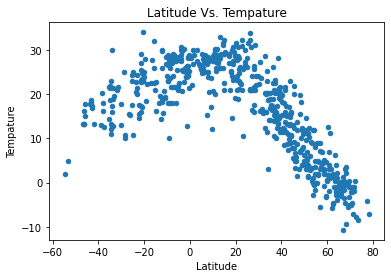

In [10]:
cleaned_city_data.plot(kind='scatter', x='Latitude', y="Tempature",title = "Latitude Vs. Tempature")

In [11]:
#The scatter plot above shows latitude of a city vs its max tempature. 

## Latitude vs. Humidity Plot

<AxesSubplot:title={'center':'Latitude Vs. Humidity'}, xlabel='Latitude', ylabel='Humidity'>

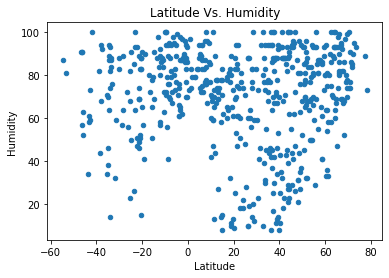

In [12]:
cleaned_city_data.plot(kind='scatter', x='Latitude', y="Humidity",title = "Latitude Vs. Humidity")

In [13]:
# The scatter plot above shows a city's latitude vs its humidy %. 

## Latitude vs. Cloudiness Plot

<AxesSubplot:title={'center':'Latitude Vs. Cloudiness'}, xlabel='Latitude', ylabel='Cloudiness'>

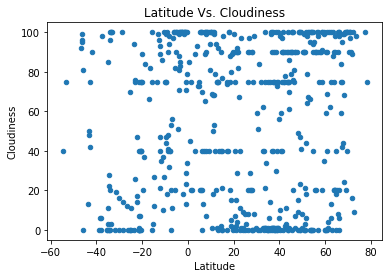

In [14]:
cleaned_city_data.plot(kind='scatter', x='Latitude', y="Cloudiness",title = "Latitude Vs. Cloudiness")

In [15]:
#The scatter above shows the latitude of a city vs iss percetage of cloudiness. 

## Latitude vs. Wind Speed Plot

<AxesSubplot:title={'center':'Latitude Vs. Wind Speed'}, xlabel='Latitude', ylabel='Wind Speed'>

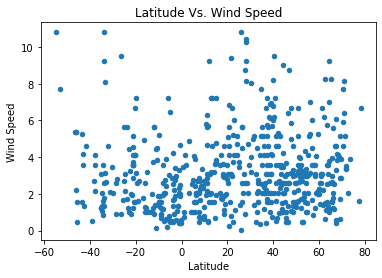

In [16]:
cleaned_city_data.plot(kind='scatter', x='Latitude', y="Wind Speed",title = "Latitude Vs. Wind Speed")

In [17]:
#The scatter plot above shows latitude of a city vs its wind speed. 

## Linear Regression

In [18]:
northern_data = city_data.loc[city_data["Latitude"]>=0]

northern_data

southern_data = city_data.loc[city_data["Latitude"]<0]

southern_data

,Cities,Country,Latitude,Longitude,Tempature,Humidity,Cloudiness,Wind Speed
5,comodoro rivadavia,AR,-45.8667,-67.5000,15.00,63,0,1.54
6,port elizabeth,ZA,-33.9180,25.5701,16.00,82,0,9.26
9,kirakira,SB,-10.4544,161.9205,28.50,63,27,1.89
11,lubango,AO,-14.9172,13.4925,16.19,69,27,1.01
12,ushuaia,AR,-54.8000,-68.3000,2.00,87,40,10.80
...,...,...,...,...,...,...,...,...
551,ambon,ID,-3.6954,128.1814,28.81,66,88,1.65
554,vangaindrano,MG,-23.3500,47.6000,21.29,93,26,1.24
556,sumenep,ID,-7.0167,113.8667,28.93,67,11,3.92
559,natal,BR,-5.7950,-35.2094,25.52,83,20,7.20


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Tempature vs. Latitude')

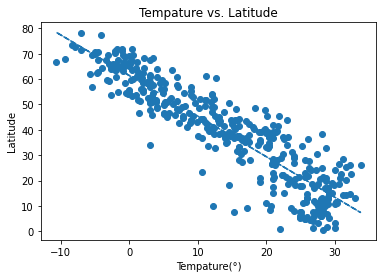

In [19]:
import scipy.stats as stats



x_value = northern_data["Tempature"] 
y_value = northern_data["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value , y_value)
regress_values = x_value * slope + intercept

m_fit = slope * x_value + intercept
plt.scatter(x_value,y_value)
plt.plot(x_value,m_fit,"--")

plt.xlabel('Tempature(°)')
plt.ylabel('Latitude')
plt.title('Tempature vs. Latitude')



In [20]:
#The linear regression above shows a negative correlation. The higher the latitude the lower the tempature. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Tempature vs. Latitude')

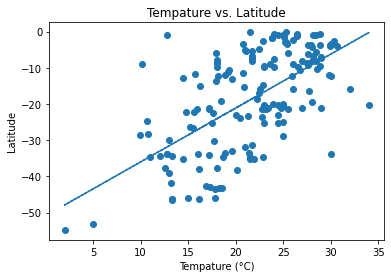

In [21]:
x_value = southern_data["Tempature"] 
y_value = southern_data["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value , y_value)
regress_values = x_value * slope + intercept

m_fit = slope * x_value + intercept
plt.scatter(x_value,y_value)
plt.plot(x_value,m_fit,"--")

plt.xlabel('Tempature (°C)')
plt.ylabel('Latitude')
plt.title('Tempature vs. Latitude')





In [ ]:
#The linear regression above shows a weak positive correlation between a city in the southern hemisphere's Tempature and Latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Humidity vs. Latitude')

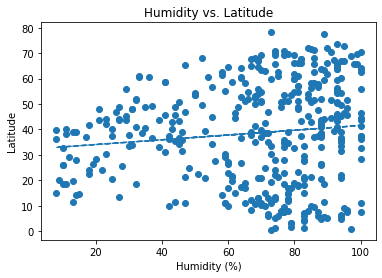

In [22]:
x_value = northern_data["Humidity"] 
y_value = northern_data["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value , y_value)
regress_values = x_value * slope + intercept

m_fit = slope * x_value + intercept
plt.scatter(x_value,y_value)
plt.plot(x_value,m_fit,"--")

plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title('Humidity vs. Latitude')


In [ ]:
#The linear regression above shows little to no correlation between a city's in the northern hemisphere's humidity and tempature. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Humidity vs. Latitude')

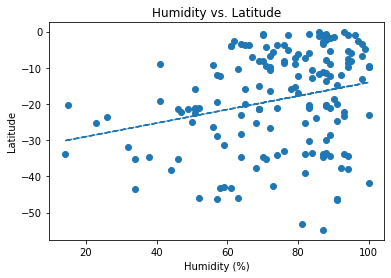

In [23]:
x_value = southern_data["Humidity"] 
y_value = southern_data["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value , y_value)
regress_values = x_value * slope + intercept

m_fit = slope * x_value + intercept
plt.scatter(x_value,y_value)
plt.plot(x_value,m_fit,"--")

plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title('Humidity vs. Latitude')


In [ ]:
#The linear regression above shows a very weak positive correlation between a city in the southern hemisphere's humidity and latitude. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Cloudiness vs. Latitude')

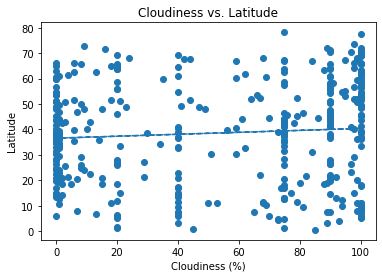

In [24]:
x_value = northern_data["Cloudiness"] 
y_value = northern_data["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value , y_value)
regress_values = x_value * slope + intercept

m_fit = slope * x_value + intercept
plt.scatter(x_value,y_value)
plt.plot(x_value,m_fit,"--")

plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title('Cloudiness vs. Latitude')




In [ ]:
#The linear regression above shows no correlation between a city in the northern hemisphere's cloudiness and latitude. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Cloudiness vs. Latitude')

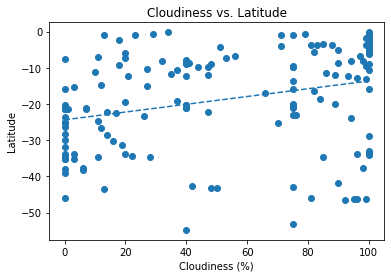

In [25]:
x_value = southern_data["Cloudiness"] 
y_value = southern_data["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value , y_value)
regress_values = x_value * slope + intercept

m_fit = slope * x_value + intercept
plt.scatter(x_value,y_value)
plt.plot(x_value,m_fit,"--")

plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title('Cloudiness vs. Latitude')

In [ ]:
#The linear regression above shows extreamly low positive correlation between a city in the southern hemisphere's cloudiness and latitude. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Wind Speed vs. Latitude')

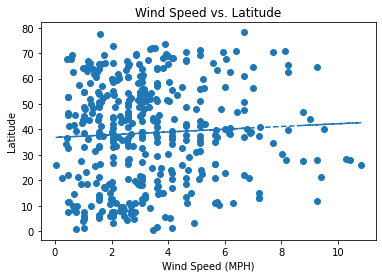

In [26]:
x_value = northern_data["Wind Speed"] 
y_value = northern_data["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value , y_value)
regress_values = x_value * slope + intercept

m_fit = slope * x_value + intercept
plt.scatter(x_value,y_value)
plt.plot(x_value,m_fit,"--")

plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Latitude')
plt.title('Wind Speed vs. Latitude')



In [ ]:
#The linear regression above shows no correlation between a city in the northern hemisphere's wind speed and latitude. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Wind Speed vs. Latitude')

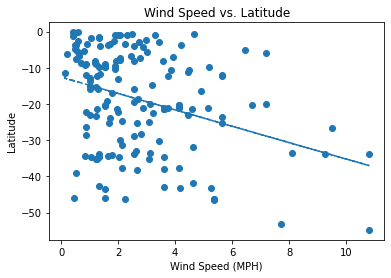

In [27]:
x_value = southern_data["Wind Speed"] 
y_value = southern_data["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value , y_value)
regress_values = x_value * slope + intercept

m_fit = slope * x_value + intercept
plt.scatter(x_value,y_value)
plt.plot(x_value,m_fit,"--")


plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Latitude')
plt.title('Wind Speed vs. Latitude')


In [ ]:
#The linear regression above shows a moderate negative correlation between a city in the southern hemisphere's wind speed and latitude. 